# SIMULACIÓN | Pauta LABORATORIO 3



### CONTENIDOS
1. Histogramas y Distribución empírica
2. Estimadores de máxima verosimilitud
3. Test de bondad de ajuste 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from IPython.display import display
import ipywidgets as widgets
from IPython.core.pylabtools import figsize
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)
datos = stats.binom.rvs(10,0.5,size=1000)

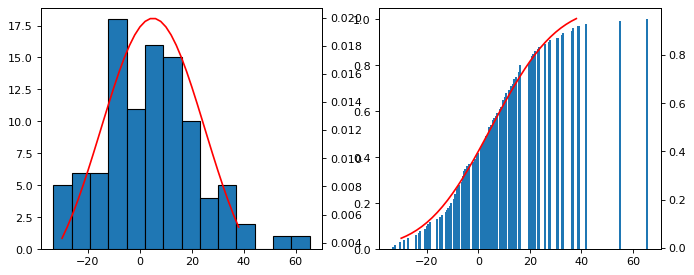

In [104]:
## Simularemos datos de una distribución normal y luego graficaremos su
## función de distribución empírica y la distribución teórica
mu=5
sigma=20
datos = stats.norm.rvs(loc=mu, scale=sigma, size=100)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(-30,40,2)
##
dvec = []
for i in vec:
    dvec.append(stats.norm.pdf(x=i, loc=mu, scale=sigma))
ax1.plot(vec,dvec,color='red')

x,cum_norm = ecdf(datos)
axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(-30,40,2)
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec,color='red')
plt.draw()


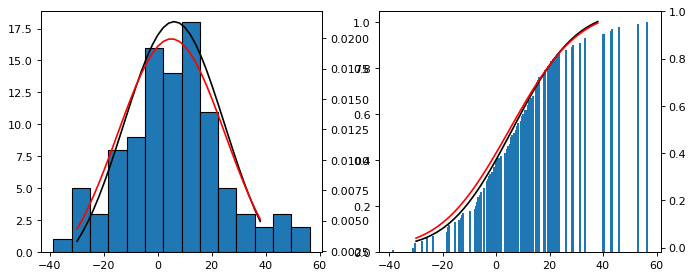

In [11]:
## Calculemos ahora los estimadores máximo verosímiles y veamos como quedan las curvas
mu0,sigma0 = stats.norm.fit(datos)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(-30,40,2)
##
dvec0 = []
for i in vec:
    dvec0.append(stats.norm.pdf(x=i, loc=mu0, scale=sigma0))
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(-30,40,2)
##
pvec0 = []
for i in vec:
    pvec0.append(stats.norm.cdf(x=i, loc=mu0, scale=sigma0))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.draw()


In [105]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos, 'norm')

KstestResult(statistic=0.5345102142479201, pvalue=3.1938176685807655e-27)

In [106]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos, 'norm', args=(mu, sigma))

KstestResult(statistic=0.08722440007080401, pvalue=0.4088393605654198)

In [107]:
## Respecto de la distribución con los parámetros MV?
stats.kstest(datos, 'norm', args=(mu0, sigma0))

KstestResult(statistic=0.09305017863777765, pvalue=0.33135001627241045)

In [108]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros MV?
datos2 = stats.norm.rvs(loc=mu0, scale= sigma0,size=1000)
stats.kstest(datos, datos2)

KstestResult(statistic=0.091, pvalue=0.41891337467915424)

#### Ejercicio1: 
Repita el ejercicio con:

(i) una muestra de datos simulados de una v.a. discreta de su elección

(ii) una muestra de datos simulados de una v.a. continua de su elección (distinta de la normal)

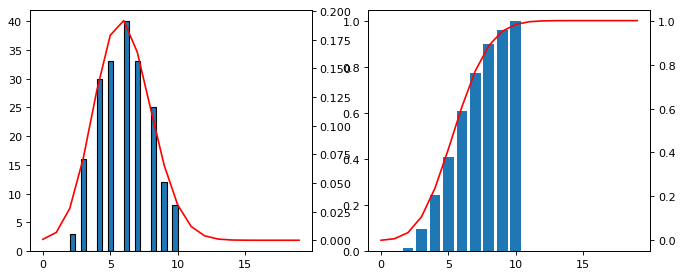

In [9]:
## Simularemos datos de una distribución binomial y luego graficaremos su
## función de distribución empírica y la distribución teórica
p=0.3
n=20
size=200
datos = stats.binom.rvs(n=n, p=p, size=size)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = n)
ax1 = axs[0].twinx()
vec = range(0,n,1)
##
dvec = []
for i in vec:
    dvec.append(stats.binom.pmf(k=i, n=n,p=p))
ax1.plot(vec,dvec,color='red')

x,cum_norm = ecdf(datos)
axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
##
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec,color='red')
plt.draw()

0.2995

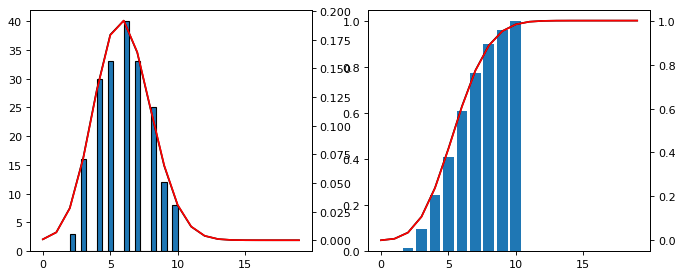

In [13]:
## Calculemos ahora el estimador máximo versosímil de p  y veamos como quedan las curvas
p0= sum(datos)/(size*n)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = n)
ax1 = axs[0].twinx()
vec = range(0,n,1)
##
dvec0 = []
for i in vec:
    dvec0.append(stats.binom.pmf(k=i, n=n,p=p0))
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
##
pvec0 = []
for i in vec:
    pvec0.append(stats.binom.cdf(k=i, n=n,p=p0))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.draw()
p0

In [14]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros originales?
datos2 = stats.binom.rvs(n=n, p=p,size=200)
stats.kstest(datos, datos2)

KstestResult(statistic=0.045, pvalue=0.9877895282790693)

In [15]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros MV?
datos2 = stats.binom.rvs(n=n, p=p0,size=200)
stats.kstest(datos, datos2)

KstestResult(statistic=0.025, pvalue=0.999999980771227)

**Comentarios 1(i)**

Para probar el ajuste de los datos simulados, y considerando que se trata de una v.a. discreta, consideramos el testde K-S de la muestra en estudio contra una nueva muestra de la v.a. binomial, con el parámetro original y con el estimado por M.V.
En ambos casos el test no nos permite rechazar la hipótesis nula de que ambas muestras corresponden a la misma distribución.

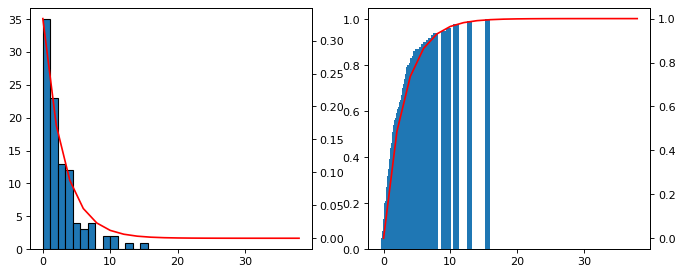

In [18]:
## Simularemos datos de una distribución exponencial y luego graficaremos su
## función de distribución empírica y la distribución teórica
s=3 

datos = stats.expon.rvs(loc=0, scale=s, size=100)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(0,40,2)
##
dvec = []
for i in vec:
    dvec.append(stats.expon.pdf(x=i, loc=0, scale=s))
ax1.plot(vec,dvec,color='red')

x,cum_norm = ecdf(datos)
axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
##
pvec = []
for i in vec:
    pvec.append(stats.expon.cdf(x=i, loc=0, scale=s))
ax2.plot(vec,pvec,color='red')
plt.draw()


(0.018472183864907826, 2.7105947367177268)

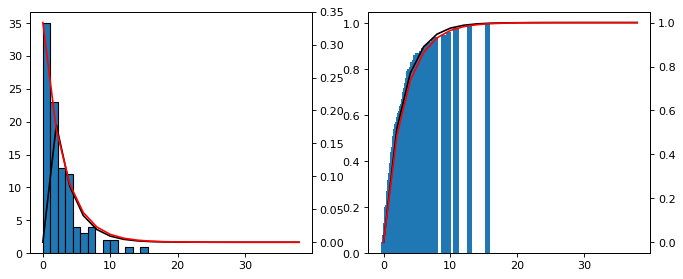

In [19]:
## Calculemos ahora los estimadores máximo verosímiles y veamos como quedan las curvas
loc0,s0 = stats.expon.fit(datos)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(0,40,2)
##
dvec0 = []
for i in vec:
    dvec0.append(stats.expon.pdf(x=i, loc=loc0, scale=s0))
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()

##
pvec0 = []
for i in vec:
    pvec0.append(stats.expon.cdf(x=i, loc=loc0, scale=s0))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.draw()
loc0, s0


In [20]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos, 'expon',args=(0,s))

KstestResult(statistic=0.08137090310793249, pvalue=0.49648089575345256)

In [21]:
## Respecto de la distribución con los parámetros MV?
stats.kstest(datos, 'expon', args=(loc0, s0))

KstestResult(statistic=0.05050533006159086, pvalue=0.9493094789817856)

In [24]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros MV?
datos2 = stats.expon.rvs(loc=loc0, scale= s0,size=1000)
stats.kstest(datos, datos2)

KstestResult(statistic=0.074, pvalue=0.6794120375062622)

**Comentarios 1(ii)**

Para probar el ajuste de los datos simulados, y considerando que se trata de una v.a. continua es posible utilizar K-S considerando los parámetros originales.
También se hace la prueba considerando los estimadores  M.V., sabiendo que en este caso la potencia del test está sobreestimada.
Para resolver esto, es preferible considerar en lugar de la comparación con la distribución teórica, la comparación con una muestra de ella.
En todos los  casos el test no nos permite rechazar la hipótesis nula de que la muestra proviene de una distribución exponencial.

## Analizaremos que ocurre con datos reales
from datetime import datetime, timedelta
datos = pd.read_csv("grandesSismos.csv")
datos.head()




In [47]:
from datetime import datetime, timedelta 
datos = pd.read_csv("grandesSismos.csv") 
datos.head()





,Fecha_local,Fecha_local1,Hora_local,Latitud,Longitud,Magnitud_Ms
0,08-02-1570,08-02-1570,9:00,-36.8,-73.00,8.3
1,17-03-1575,17-03-1575,10:00,-33.4,-70.60,7.3
2,16-12-1575,16-12-1575,14:30,-39.8,-73.20,8.5
3,24-11-1604,24-11-1604,12:30,-18.5,-70.40,8.5
4,16-09-1615,16-09-1615,23:30,-18.5,-70.35,8.8


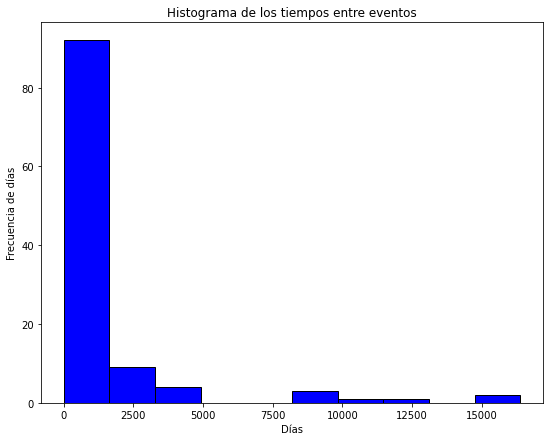

In [40]:
vec1 = datos['Fecha_local']
dtpo = []
ind = list(range(112))
for i in ind:
    fecha1 = datetime.strptime(vec1[i], '%d-%m-%Y')
    fecha2 = datetime.strptime(vec1[i+1], '%d-%m-%Y')
    num = fecha2-fecha1
    num = num/timedelta(days=1)
    dtpo.append(num)
    
figsize(9, 7)


# Hacer histograma usando matplotlib, los bins deben ser enteros

plt.hist(dtpo, color = 'blue', edgecolor = 'black')

# Agrega texto
plt.title('Histograma de los tiempos entre eventos')
plt.xlabel('Días'); plt.ylabel('Frecuencia de días');

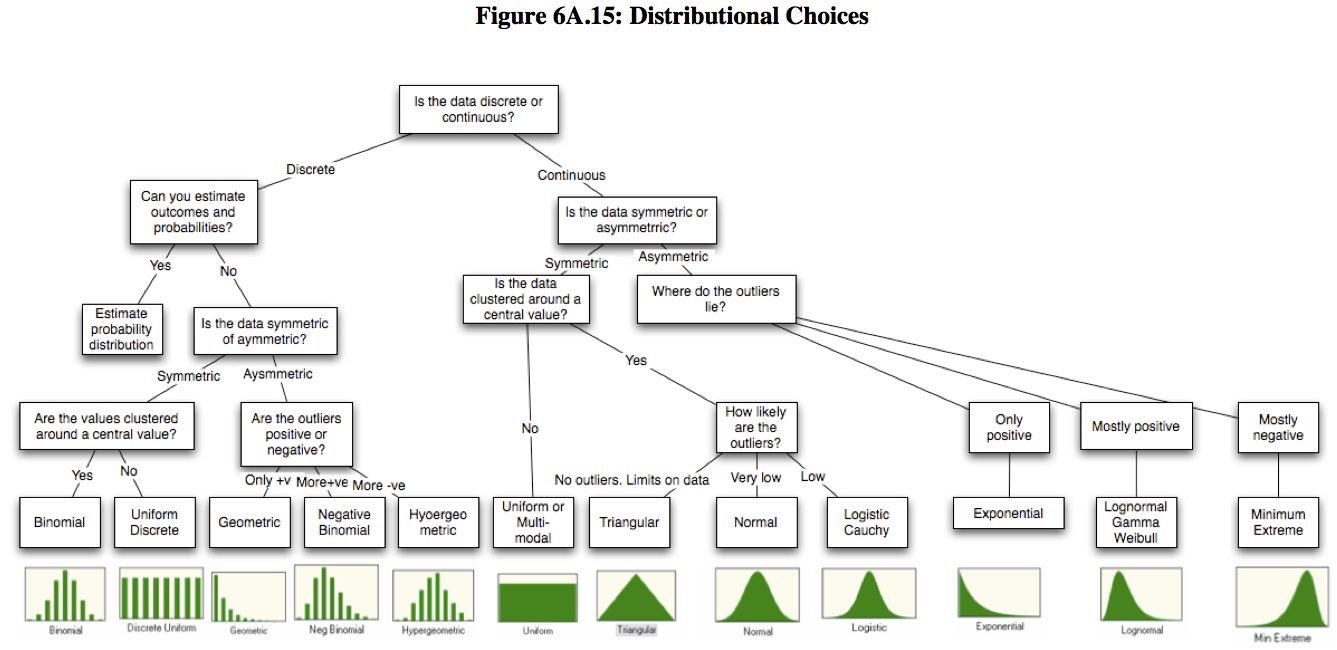

(0.0, 1457.3125)


(0.0, 1457.3125)

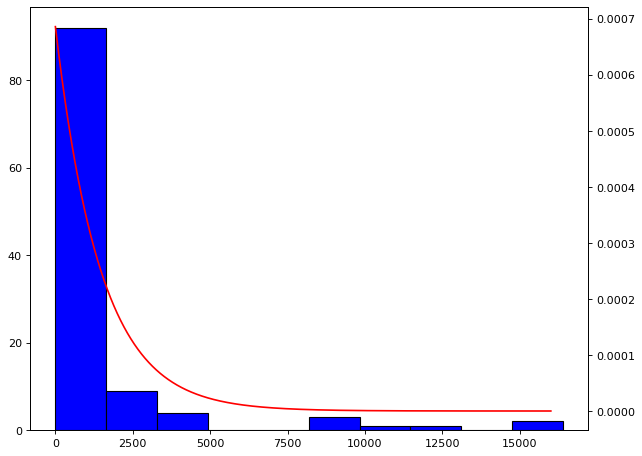

In [41]:
## ajuste de distribución exponencial considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(9,7), dpi=80)

ax.hist(dtpo, color = 'blue', edgecolor = 'black')
ax2 = ax.twinx()
args = stats.expon.fit(dtpo)
print(args)

vec = list(range(16000))

pvec = []
for i in vec:
    pvec.append(stats.expon.pdf(x=i,scale=args[1],loc=args[0]))
    
ax2.plot(vec,pvec, color='red')

plt.draw()

args

In [42]:
datos2 = stats.expon.rvs(*args,size=114)

stats.kstest(dtpo, datos2)

KstestResult(statistic=0.2150689223057644, pvalue=0.008406399242053109)

#### Ejercicio 2:

(i) Interprete el resultado. ¿Qué otros modelos es razonable considerar? ¿Qué filtro en los datos podría mejorar el ajuste?

(ii) Desarrolle alguno de los análisis propuestos en (i). Comente sus resultados.

**Respuesta Ejercicio 2 (i)**
Los resultados nos indican que se rechaza la hipótesis nula de que los tiempos entre grandes sismos se distribuye según una exponencial. Sería razonable probar otras distribuciones de probabilidad, por ejemplo Weibull. Otra alternativa es filtrar los datos para que pertenezcan a una zona geográfica mas acotada, o quizás no considerar los primeros registros que podrían no ser tan exactos (no tener todos los datos).

**Respuesta Ejercicio 2 (ii)**
Se opta por filtrar los datos con diferencias de tiempo mayores a 7000, todos los cuales corresponden a registros de mas de un siglo atrás y se supone que corresponden a falta de registros.


(0.0, 784.152380952381)


(0.0, 784.152380952381)

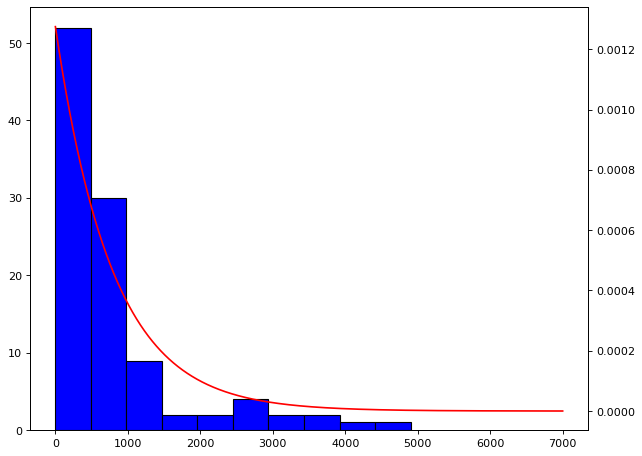

In [60]:
dtpo = np.array(dtpo)
dtpoF = dtpo[dtpo<7000]
fig, ax = plt.subplots(1, 1,figsize=(9,7), dpi=80)

ax.hist(dtpoF, color = 'blue', edgecolor = 'black')
ax2 = ax.twinx()
args = stats.expon.fit(dtpoF)
print(args)

vec = list(range(7000))

pvec = []
for i in vec:
    pvec.append(stats.expon.pdf(x=i,scale=args[1],loc=args[0]))
    
ax2.plot(vec,pvec, color='red')

plt.draw()

args

In [61]:
datos2 = stats.expon.rvs(*args,size=1000)

stats.kstest(dtpoF, datos2)

KstestResult(statistic=0.0818095238095238, pvalue=0.519582003682939)

**Comentarios Pregunta 2(ii)**

Con el filtro realizado, no se puede rechazar la hipótesis de que los datos provienen de una distribución exponencial.

#### Ejercicio 3: 
Considere los datos analizados en la sesión anterior y estudie la posibilidad de ajustarles alguna distribución de probabilidad conocida, incluyendo estimación de parámetros por máxima verosimilitud y  el test de ajuste de k-s respectivo.